In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime

columns = ['Res_ID', 'Data_Year', 'C_Type', 'C_Name', 'Opening_Year', 'Population', 'Age_Group', 'Opening_Hours', 'Seating_Capacity', 'Car_Parking', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R', 'Expense', 'Revenue']
data = pd.read_csv('First_Five_Year.csv', header=None, names=columns)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print("(Rows, Columns) :",data.shape)
data

(Rows, Columns) : (500, 19)


,Res_ID,Data_Year,C_Type,C_Name,Opening_Year,Population,Age_Group,Opening_Hours,Seating_Capacity,Car_Parking,R1,R2,R3,R4,R5,R6,R,Expense,Revenue
0,1,2012,AM,Miami,26/06/1971,48447,A,5200,49,Y,4.10,3.98,4.56,3.99,3.60,3.12,3.80,0.399,0.569
1,2,2012,AA,Singapore,23/11/1971,78452,A,5298,51,Y,4.89,3.59,3.99,4.59,3.09,3.02,4.00,0.489,0.741
2,3,2012,AM,Miami,17/02/1973,43154,A,4359,51,Y,4.31,4.14,4.22,4.52,4.21,4.19,4.41,0.386,0.689
3,4,2012,GG,Osaka,16/07/1974,126947,A,5194,17,N,3.05,2.98,3.01,4.40,3.24,3.22,2.03,0.321,0.521
4,5,2012,IM,Toronto,09/05/1975,47770,T,5001,45,Y,4.50,3.96,3.50,4.00,3.02,4.00,3.90,0.210,0.352
5,6,2012,GG,Paris,06/03/1976,36920,T,3559,16,N,4.25,3.64,2.45,3.04,4.12,3.07,3.54,0.328,0.525
6,7,2012,FC,Qingdao,28/01/1976,17800,T,3901,18,N,3.30,2.05,2.80,2.99,3.59,3.46,3.00,0.259,0.289
7,8,2012,AA,Hong Kong,20/04/1977,64067,E,4628,37,N,3.67,3.72,3.54,3.76,3.48,3.67,3.59,0.189,0.291
8,9,2012,AA,Moscow,26/06/1977,52520,E,4900,31,N,5.00,4.02,4.50,4.00,3.50,3.20,4.50,0.159,0.249
9,10,2012,GG,Paris,03/02/1978,35875,A,4020,30,Y,4.20,3.50,4.50,4.20,4.50,3.80,4.00,0.367,0.528


In [2]:
data = data.replace({'C_Type':{'GG':1, 'AA':2, 'EG':3, 'FC':4, 'KC':5, 'AM':6, 'IM':7}})
data = data.replace({'C_Name':{'Beijing':1, 'Berlin':2, 'Charlotte':3, 'Chengdu':4, 'Hong Kong':5, 'Istanbul':6, 'London':7, 'Los Angeles':8, 'Mexico City':9, 'Miami':10, 'Moscow':11, 'Mumbai':12, 'New York':13, 'Osaka':14, 'Paris':15, 'Qingdao':16, 'Sacramento':17, 'San Jose':18, 'Seattle':19, 'Seoul':20, 'Shanghai':21, 'Singapore':22, 'Stockholm':23, 'Sydney':24, 'Tokyo':25, 'Toronto':26, 'Zhengzhou':27}})
data = data.replace({'Age_Group':{'T':1, 'A':2, 'E':3}})
data = data.replace({'Car_Parking':{'Y':1, 'N':0}})
data = data.replace({'Car_Parking':{'Y':1, 'N':0}})
data['Opening_Year'] = [datetime.strptime(x, '%d/%m/%Y') for x in data['Opening_Year']]
data['Opening_Year'] = pd.DatetimeIndex(data['Opening_Year']).year
data

,Res_ID,Data_Year,C_Type,C_Name,Opening_Year,Population,Age_Group,Opening_Hours,Seating_Capacity,Car_Parking,R1,R2,R3,R4,R5,R6,R,Expense,Revenue
0,1,2012,6,10,1971,48447,2,5200,49,1,4.10,3.98,4.56,3.99,3.60,3.12,3.80,0.399,0.569
1,2,2012,2,22,1971,78452,2,5298,51,1,4.89,3.59,3.99,4.59,3.09,3.02,4.00,0.489,0.741
2,3,2012,6,10,1973,43154,2,4359,51,1,4.31,4.14,4.22,4.52,4.21,4.19,4.41,0.386,0.689
3,4,2012,1,14,1974,126947,2,5194,17,0,3.05,2.98,3.01,4.40,3.24,3.22,2.03,0.321,0.521
4,5,2012,7,26,1975,47770,1,5001,45,1,4.50,3.96,3.50,4.00,3.02,4.00,3.90,0.210,0.352
5,6,2012,1,15,1976,36920,1,3559,16,0,4.25,3.64,2.45,3.04,4.12,3.07,3.54,0.328,0.525
6,7,2012,4,16,1976,17800,1,3901,18,0,3.30,2.05,2.80,2.99,3.59,3.46,3.00,0.259,0.289
7,8,2012,2,5,1977,64067,3,4628,37,0,3.67,3.72,3.54,3.76,3.48,3.67,3.59,0.189,0.291
8,9,2012,2,11,1977,52520,3,4900,31,0,5.00,4.02,4.50,4.00,3.50,3.20,4.50,0.159,0.249
9,10,2012,1,15,1978,35875,2,4020,30,1,4.20,3.50,4.50,4.20,4.50,3.80,4.00,0.367,0.528


In [3]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 18].values
in_train, in_test, out_train, out_test = train_test_split(x, y, test_size = 0.25, random_state = 32)
model = LinearRegression()
model.fit(in_train, out_train)

out_test_pred = model.predict(in_test)
accuracy = model.score(in_test, out_test)
print('Accuracy:',round(accuracy*100, 2),'%')

Accuracy: 84.85 %


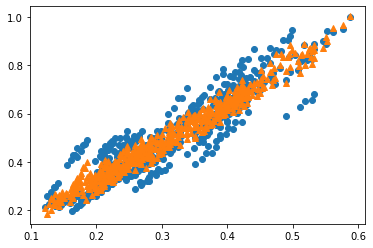

In [4]:
out_pred = model.predict(x)
plt.plot(data['Expense'], data['Revenue'], 'o')
plt.plot(data['Expense'], out_pred, '^')
plt.show()

In [5]:
sum_expense = sum(data['Expense'])
sum_revenue = sum(data['Revenue'])
sum_pred_revenue = sum(out_pred)
print(sum_expense,'\n')
print(sum_revenue,'\n')
print(sum_pred_revenue,'\n')
error  = abs(sum_revenue - sum_pred_revenue)/sum_pred_revenue
print('Error:',round(error*100, 2),'%')

156.4340000000001 

253.2289999999999 

253.4041401352922 

Error: 0.07 %


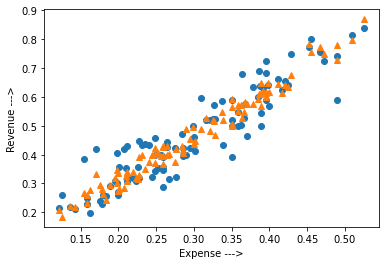

Year 1 net expense: 29.73700000000001 

Year 1 net revenue: 46.384000000000015 

Year 1 net predicted revenue: 46.37387642682738 

Error: 0.02 %


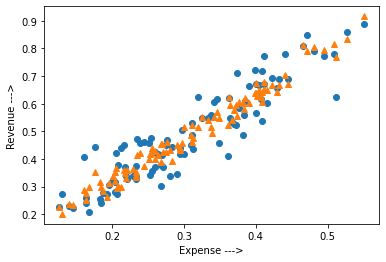

Year 2 net expense: 30.822000000000003 

Year 2 net revenue: 48.938 

Year 2 net predicted revenue: 49.00052536480886 

Error: 0.13 %


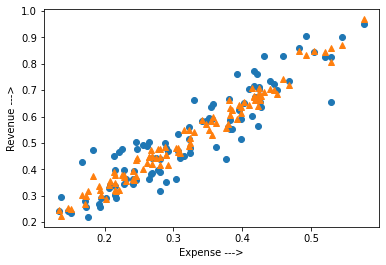

Year 3 net expense: 32.116 

Year 3 net revenue: 51.963000000000015 

Year 3 net predicted revenue: 51.96078833685914 

Error: 0.0 %


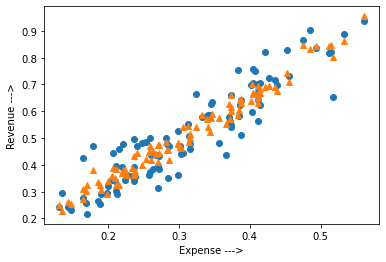

Year 4 net expense: 31.296999999999993 

Year 4 net revenue: 51.53600000000001 

Year 4 net predicted revenue: 51.709449419371126 

Error: 0.34 %


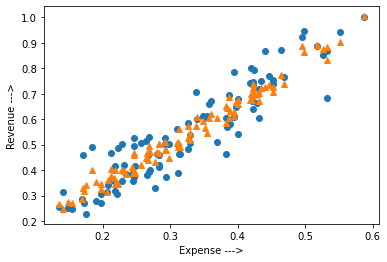

Year 5 net expense: 32.46199999999998 

Year 5 net revenue: 54.408000000000015 

Year 5 net predicted revenue: 54.35950058742543 

Error: 0.09 %


In [6]:
year = []
population = []
openinghrs = []
net_exp = []
net_rev = []
net_rev_pred = []
for i in range(1, 6):
    file = 'Year'+str(i)+'.csv'
    yearly = pd.read_csv(file, header=None, names=columns)
    pd.set_option("display.max_rows", None, "display.max_columns", None)

    yearly = yearly.replace({'C_Type':{'GG':1, 'AA':2, 'EG':3, 'FC':4, 'KC':5, 'AM':6, 'IM':7}})
    yearly = yearly.replace({'C_Name':{'Beijing':1, 'Berlin':2, 'Charlotte':3, 'Chengdu':4, 'Hong Kong':5, 'Istanbul':6, 'London':7, 'Los Angeles':8, 'Mexico City':9, 'Miami':10, 'Moscow':11, 'Mumbai':12, 'New York':13, 'Osaka':14, 'Paris':15, 'Qingdao':16, 'Sacramento':17, 'San Jose':18, 'Seattle':19, 'Seoul':20, 'Shanghai':21, 'Singapore':22, 'Stockholm':23, 'Sydney':24, 'Tokyo':25, 'Toronto':26, 'Zhengzhou':27}})
    yearly = yearly.replace({'Age_Group':{'T':1, 'A':2, 'E':3}})
    yearly = yearly.replace({'Car_Parking':{'Y':1, 'N':0}})
    yearly = yearly.replace({'Car_Parking':{'Y':1, 'N':0}})
    yearly['Opening_Year'] = [datetime.strptime(x, '%d/%m/%Y') for x in yearly['Opening_Year']]
    yearly['Opening_Year'] = pd.DatetimeIndex(yearly['Opening_Year']).year
    
    x1 = yearly.iloc[:, :-1].values
    y1 = yearly.iloc[:, 18].values

    out_pred = model.predict(x1)
    plt.plot(yearly['Expense'], yearly['Revenue'], 'o')
    plt.plot(yearly['Expense'], out_pred, '^')
    plt.xlabel("Expense --->")
    plt.ylabel("Revenue --->")
    plt.show()

    sum_expense = sum(yearly['Expense'])
    sum_revenue = sum(yearly['Revenue'])
    sum_pred_revenue = sum(out_pred)
    print('Year',i,'net expense:',sum_expense,'\n')
    print('Year',i,'net revenue:',sum_revenue,'\n')
    print('Year',i,'net predicted revenue:',sum_pred_revenue,'\n')

    error  = abs(sum_revenue - sum_pred_revenue)/sum_pred_revenue
    print('Error:',round(error*100, 2),'%')
    year.append(yearly['Data_Year'][1])
    net_exp.append(sum_expense)
    net_rev.append(sum_revenue)
    net_rev_pred.append(sum_pred_revenue)
    population.append(sum(yearly['Population']))
    openinghrs.append(sum(yearly['Opening_Hours']))

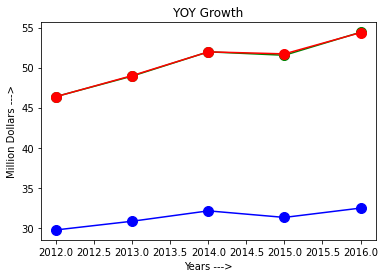

In [7]:
plt.plot(year, net_exp, color = 'blue', linestyle = 'solid', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.plot(year, net_rev, color = 'green', linestyle = 'solid', marker = 'o', markerfacecolor = 'green', markersize = 10)
plt.plot(year, net_rev_pred, color = 'red', linestyle = 'solid', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("YOY Growth")
plt.xlabel("Years --->")
plt.ylabel("Million Dollars --->")
plt.show()

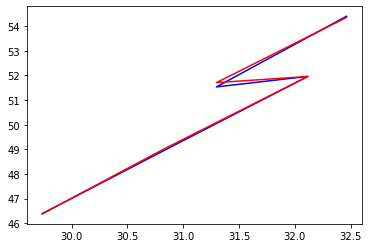

In [8]:
plt.plot(net_exp, net_rev, color = 'blue')
plt.plot(net_exp, net_rev_pred, color = 'red')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout